# SORTING CONTOURS
- When we use cv2.findContours, it does not return the contour of objects in a sorted manner, that is, top-bottom or left-right.

In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import create_subplot, display_image
from matplotlib import pyplot as plt

In [3]:
args = {
    "image1":"../../images/lego_blocks_1.png",
    "image2":"../../images/lego_blocks_2.png",
    "method":"top-to-bottom"
}

### Important points 
- b is tuple (cnts, boundingBoxes). 
- b[1] refers to boundingBox(e.g (x,y,w,h))
- if you want to sort contour horizontally, i.e, left-to-right or right-to-left, sort key is b[1][0]. This means we sort the bounding boxes by x co-ordinate.
- For sorting vertically, sort key is b[1][1]. This means we sort the bounding box by y-coordinate

In [4]:
def sort_contours(cnts, method="left-to-right"):
    #initialize the reverse flag and sort index
    reverse = False
    i = 0
    
    #handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse= True
        
    #handle if we are sorting vertically.
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    
    # construct list of bounding boxes and sort from top to bottom
    # b is tuple (cnts, boundingBoxes). 
    # b[1] refers to boundingBox
    # if you want the text to be  b[1][0] 
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                               key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [5]:
def draw_contour(image, c, i):
    #compute the center of contour area and draw a circle representing center
    M = cv2.moments(c)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    
    #draw the contour number on the image
    cv2.putText(image, "#{}".format(i+1), (cx-20,cy), cv2.FONT_HERSHEY_SIMPLEX,
               1.0, (255,255,255),2)
    return image

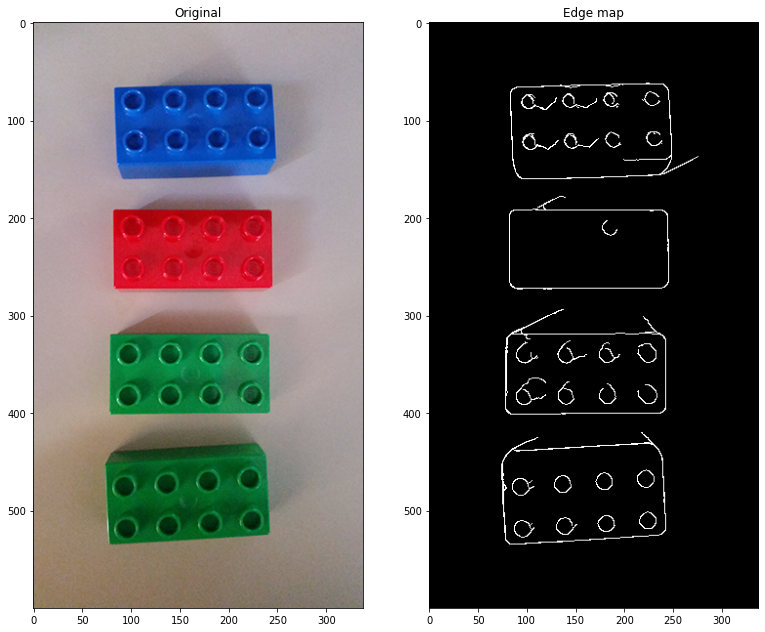

In [6]:
image = cv2.imread(args["image1"])
accumEdged = np.zeros(image.shape[:2], dtype="uint8")

for chan in cv2.split(image):
    chan = cv2.medianBlur(chan, 11)
    edged = cv2.Canny(chan, 50,200)
    accumEdged = cv2.bitwise_or(accumEdged, edged)

fig = plt.figure(figsize=(13,13))
rows = 1
colums = 2
create_subplot(fig, rows, colums, 1, "Original", image)
create_subplot(fig, rows, colums, 2, "Edge map", accumEdged)

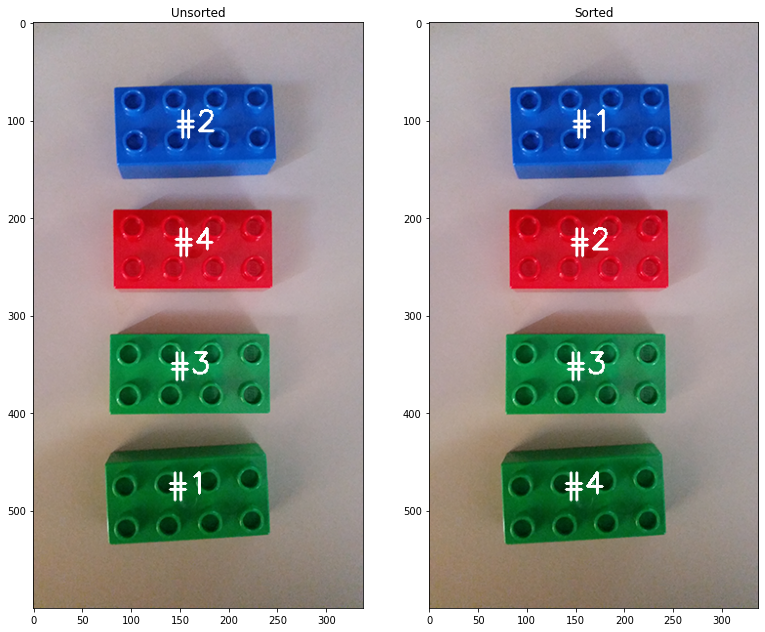

In [7]:
fig = plt.figure(figsize=(13,13))
rows = 1
columns = 2


# find contours in accumulated image keeping only the largest ones
cnts = cv2.findContours(accumEdged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
orig = image.copy()

#loop over unsorted contours and draw them
for (i,c) in enumerate(cnts):
    orig = draw_contour(orig, c, i)
    
#show the original unsorted contour image
create_subplot(fig, rows, columns, 1, "Unsorted", orig)

#sort the contours acc. to provided method
(cnts, boundingBoxes) = sort_contours(cnts, method=args["method"])

#draw sorted contours and draw
for (i,c) in enumerate(cnts):
    draw_contour(image, c, i)
    
create_subplot(fig, rows, columns, 2, "Sorted", image)